In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python3 --version

Python 3.10.11


In [ ]:
pip list | grep tensorflow

tensorflow                    2.12.0
tensorflow-datasets           4.9.2
tensorflow-estimator          2.12.0
tensorflow-gcs-config         2.12.0
tensorflow-hub                0.13.0
tensorflow-io-gcs-filesystem  0.32.0
tensorflow-metadata           1.13.1
tensorflow-probability        0.20.1


In [ ]:
pip install import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.5 MB/s eta 0:00:00


In [ ]:
%cd drive/MyDrive/capstondesign/

/content/drive/MyDrive/capstondesign


In [ ]:
ls

'Car-Hacking Dataset'/               Flask_server/       test3.csv
 checkpoint/                         Model_train.ipynb   test4.csv
 check_validation_Timeseires.ipynb   test_10.csv         test_data/
 CNNLSTM_model.ipynb                 test1.csv           Untitled0.ipynb
 Data_Preprocessing.ipynb            test2.csv


In [ ]:

import import_ipynb
import sys
import sklearn
import tensorflow as tf
import keras


from keras.utils.np_utils  import to_categorical
from keras.models import Model
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Conv1D, MaxPooling1D, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

from numpy import load

import os
import gc
import random
#from CNNLSTM_model import Model



In [ ]:

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/capstondesign/Car-Hacking Dataset/normal.csv')
df1.head(10)

df2 = pd.read_csv('/content/drive/MyDrive/capstondesign/Car-Hacking Dataset/gear.csv')
df2['Label'] = df2['Label'].replace('T',1)

df3 = pd.read_csv('/content/drive/MyDrive/capstondesign/Car-Hacking Dataset/rpm.csv')
df3['Label'] = df3['Label'].replace('T',1)

df4 = pd.read_csv('/content/drive/MyDrive/capstondesign/Car-Hacking Dataset/fuzzy.csv')
df4['Label'] = df4['Label'].replace('T',1)

df5 = pd.read_csv('/content/drive/MyDrive/capstondesign/Car-Hacking Dataset/dos.csv')
df5['Label'] = df5['Label'].replace('T',1)

# df1.drop('CAN ID',axis=1,inplace = True)
# df2.drop('CAN ID',axis=1,inplace = True)
# df3.drop('CAN ID',axis=1,inplace = True)
# df4.drop('CAN ID',axis=1,inplace = True)
# df5.drop('CAN ID',axis=1,inplace = True)

In [ ]:
print(' label Count:', df1['Label'].value_counts())
print(' label Count:', df2['Label'].value_counts())
print(' label Count:', df3['Label'].value_counts())
print(' label Count:', df4['Label'].value_counts())
print(' label Count:', df5['Label'].value_counts())

 label Count: 0    988871
Name: Label, dtype: int64
 label Count: 1    597252
Name: Label, dtype: int64
 label Count: 1    654897
Name: Label, dtype: int64
 label Count: 1    491847
Name: Label, dtype: int64
 label Count: 1    587521
Name: Label, dtype: int64


In [ ]:
dftrl = [df1[:int(df1.shape[0]*0.6)]]
dftr = pd.concat(dftrl,ignore_index=True)
dftr.shape

dfvl = [df1[int(df1.shape[0]*0.6):int(df1.shape[0]*0.8)]]
dfv = pd.concat(dfvl,ignore_index=True)
dftl = [df1[int(df1.shape[0]*0.8):int(df1.shape[0]*1)],df2,df3,df4,df5]
dft = pd.concat(dftl,ignore_index=True)




In [ ]:
# dfv.head(30)
dft.head(30)

,Timestamp,CAN ID,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Label
0,1.479122e+09,320,8,0,0,0,0,8,32,37,157,0
1,1.479122e+09,1264,8,0,0,0,128,0,96,3,20,0
2,1.479122e+09,688,5,106,20,0,7,134,0,0,0,0
3,1.479122e+09,704,8,20,0,0,0,0,0,0,0,0
4,1.479122e+09,399,8,254,46,0,0,0,70,0,0,0
5,1.479122e+09,608,8,52,61,61,48,255,145,103,5,0
6,1.479122e+09,672,8,0,0,116,29,1,4,221,0,0
7,1.479122e+09,790,8,5,61,212,10,61,42,0,122,0
8,1.479122e+09,809,8,135,183,127,20,18,32,0,20,0
9,1.479122e+09,1349,8,216,0,0,142,0,0,0,0,0


In [ ]:
cols_to_scale = ['DLC','Data1', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6', 'Data7', 'Data8']
scaler = StandardScaler()

dftr[cols_to_scale] = scaler.fit_transform(dftr[cols_to_scale])
dfv[cols_to_scale] = scaler.transform(dfv[cols_to_scale])
dft[cols_to_scale] = scaler.transform(dft[cols_to_scale])

time1 = dftr['Timestamp']
time2 = dfv['Timestamp']
time3 = dft['Timestamp']


time_scaler = MinMaxScaler(feature_range=(0, 10))
dftr['Timestamp'] = time_scaler.fit_transform(time1.values.reshape(-1,1)).flatten()
dfv['Timestamp'] = time_scaler.transform(time2.values.reshape(-1,1)).flatten()
dft['Timestamp'] = time_scaler.transform(time3.values.reshape(-1,1)).flatten()

In [ ]:
dft.head(30)

,Timestamp,CAN ID,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Label
0,13.333371,320,0.242935,-0.774335,-0.826376,-0.659567,-0.723521,-0.613798,-0.383133,0.169640,1.530030,0
1,13.333379,1264,0.242935,-0.774335,-0.826376,-0.659567,0.654422,-0.705679,0.455046,-0.410323,-0.422188,0
2,13.333401,688,-3.147210,0.321695,-0.539289,-0.659567,-0.648165,0.833333,-0.802223,-0.461496,-0.707183,0
3,13.333505,704,0.242935,-0.567537,-0.826376,-0.659567,-0.723521,-0.705679,-0.802223,-0.461496,-0.707183,0
4,13.333512,399,0.242935,1.852001,-0.166075,-0.659567,-0.723521,-0.705679,0.114536,-0.461496,-0.707183,0
5,13.333520,608,0.242935,-0.236660,0.049240,0.341637,-0.206793,2.223038,1.096778,1.295451,-0.635934,0
6,13.333528,672,0.242935,-0.774335,-0.826376,1.244362,-0.411331,-0.694194,-0.749837,3.308265,-0.707183,0
7,13.333535,790,0.242935,-0.722635,0.049240,2.820027,-0.615870,-0.005084,-0.252168,-0.461496,1.031288,0
8,13.333543,809,0.242935,0.621553,1.800472,1.424907,-0.508218,-0.498946,-0.383133,-0.461496,-0.422188,0
9,13.333551,1349,0.242935,1.459085,-0.826376,-0.659567,0.805134,-0.705679,-0.802223,-0.461496,-0.707183,0


In [ ]:
dftr= np.expand_dims(dftr,axis=-1)
dftr= np.reshape(dftr,(dftr.shape[0],1,dftr.shape[1]))

dfv = np.expand_dims(dfv,axis=-1)
dfv = np.reshape(dfv,(dfv.shape[0],1,dfv.shape[1]))

dft= np.expand_dims(dft,axis=-1)
dft= np.reshape(dft,(dft.shape[0],1,dft.shape[1]))

X_train = dftr[:,:,:-1]
y_train = dftr[:,:,-1]

X_val = dfv[:,:,:-1]
y_val = dfv[:,:,-1]

X_test = dft[:,:,:-1]
y_test = dft[:,:,-1]

In [ ]:
X_train.shape,y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape

((593322, 1, 10),
 (593322, 1),
 (197774, 1, 10),
 (197774, 1),
 (2529292, 1, 10),
 (2529292, 1))

In [ ]:
gc.collect()

0

In [ ]:
# Define the input shape
input_shape = (1, 10)

# Define the LSTM autoencoder architecture with convolutional layers in the encoder
inputs = Input(shape=input_shape)

encoded = LSTM(32, activation='relu',return_sequences=False)(inputs)
decoded = RepeatVector(input_shape[0])(encoded)
decoded = LSTM(32, activation='relu', return_sequences=True)(decoded)
outputs = TimeDistributed(Dense(input_shape[1]))(decoded)


# Compile the model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# Model train
batch_size = 128

model.fit(X_train, X_train, epochs=20, batch_size=batch_size,steps_per_epoch=None, validation_data = (X_val,X_val),callbacks=[early_stopping]) 



Epoch 1/20
4636/4636 [==============================] - 45s 8ms/step - loss: 0.0813 - val_loss: 0.0023
Epoch 2/20
4636/4636 [==============================] - 36s 8ms/step - loss: 1.8246e-04 - val_loss: 0.0010
Epoch 3/20
4636/4636 [==============================] - 36s 8ms/step - loss: 6.8044e-05 - val_loss: 6.4005e-04
Epoch 4/20
4636/4636 [==============================] - 37s 8ms/step - loss: 4.6429e-05 - val_loss: 3.7144e-04
Epoch 5/20
4636/4636 [==============================] - 36s 8ms/step - loss: 3.8010e-05 - val_loss: 2.8733e-04
Epoch 6/20
4636/4636 [==============================] - 37s 8ms/step - loss: 3.2454e-05 - val_loss: 2.6993e-04
Epoch 7/20
4636/4636 [==============================] - 35s 8ms/step - loss: 3.0495e-05 - val_loss: 3.6036e-04
Epoch 8/20
4636/4636 [==============================] - 35s 8ms/step - loss: 2.6976e-05 - val_loss: 1.5171e-04
Epoch 9/20
4636/4636 [==============================] - 35s 8ms/step - loss: 2.6107e-05 - val_loss: 1.4728e-04
Epoch 10/20
4

In [ ]:
encoder = model
encoded_train = encoder.predict(X_train)
encoded_val = encoder.predict(X_val)
encoded_test = encoder.predict(X_test)

79041/79041 [==============================] - 135s 2ms/step


In [ ]:
from collections import Counter

# Calculate the reconstruction error
criterion = np.mean(np.power(X_train -encoded_train , 2), axis=1)
mse = np.mean(np.power(X_val -encoded_val , 2), axis=1)
threshold = np.max(criterion)
print('threshold:',threshold)

# Label the data as normal or anomalous based on the threshold value
for i in list([0.01,0.05,0.1,0.2,0.3,0.4,0.5]):
  y_pred = np.where(mse > threshold* i , 1, 0)
  y_pred = np.mean(y_pred, axis=1)
  cm = confusion_matrix(y_val, y_pred.round())

  print('Classification report:\n', classification_report(y_val, y_pred.round()))

threshold: 0.008140372473555368
Confusion matrix:
 [[158569  39205]
 [     0      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89    197774
         1.0       0.00      0.00      0.00         0

    accuracy                           0.80    197774
   macro avg       0.50      0.40      0.44    197774
weighted avg       1.00      0.80      0.89    197774

0.801768685469273
Confusion matrix:
 [[195415   2359]
 [     0      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    197774
         1.0       0.00      0.00      0.00         0

    accuracy                           0.99    197774
   macro avg       0.50      0.49      0.50    197774
weighted avg       1.00      0.99      0.99    197774

0.9880722440765722
Confusion matrix:
 [[197121    653]
 [     0      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    197774
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    197774
   macro avg       0.50      0.50      0.50    197774
weighted avg       1.00      1.00      1.00    197774

0.9966982515396362
Confusion matrix:
 [[197772      2]
 [     0      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    197774
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    197774
   macro avg       0.50      0.50      0.50    197774
weighted avg       1.00      1.00      1.00    197774

0.9999898874472883
Confusion matrix:
 [[197774]]
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    197774

    accuracy                           1.00    197774
   macro avg       1.00      1.00      1.00    197774
weighted avg       1.00      1.00      1.00    197774

1.0
Confusion matrix:
 [[197774]]
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    197774

    accuracy                           1.00    197774
   macro avg       1.00      1.00      1.00    197774
weighted avg       1.00    

threshold: 0.008140372473555368
<<<<<  {0.00100} >>>>>
Confusion matrix:
 [[     26  197749]
 [      0 2331517]]
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.00      0.00    197775
         1.0       0.92      1.00      0.96   2331517

    accuracy                           0.92   2529292
   macro avg       0.96      0.50      0.48   2529292
weighted avg       0.93      0.92      0.88   2529292

0.921816460891032
<<<<<  {0.00500} >>>>>
Confusion matrix:
 [[   2047  195728]
 [      0 2331517]]
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.01      0.02    197775
         1.0       0.92      1.00      0.96   2331517

    accuracy                           0.92   2529292
   macro avg       0.96      0.51      0.49   2529292
weighted avg       0.93      0.92      0.89   2529292

0.9226154987245443
<<<<<  {0.00700} >>>>>
Confusion matrix:
 [[   9319  188456]
 [    

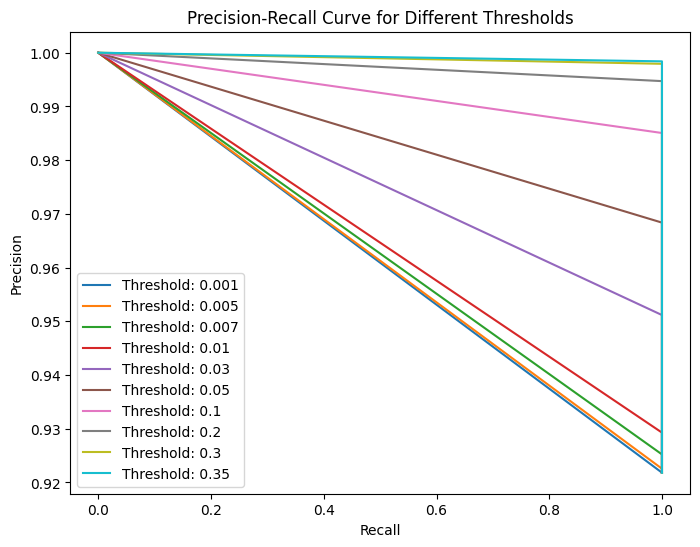

In [ ]:
from collections import Counter

# Calculate the reconstruction error
criterion = np.mean(np.power(X_train -encoded_train , 2), axis=1)
mse = np.mean(np.power(X_test -encoded_test , 2), axis=1)
threshold = np.max(criterion)
print('threshold:',threshold)

# Empty lists to store precision and recall values for each threshold
precisions = []
recalls = []

# Label the data as normal or anomalous based on the threshold value
for i in list([0.001,0.005,0.007,0.01,0.03,0.05,0.1,0.2,0.3,0.35]):
  print('<<<<<  {%.5f} >>>>>'%(i))
  y_pred = np.where(mse > threshold* i , 1, 0)
  y_pred = np.mean(y_pred, axis=1)
  precision, recall, _ = precision_recall_curve(y_test, y_pred.round())
    
    # Append precision and recall values to the lists
  precisions.append(precision)
  recalls.append(recall)
    
   
  cm = confusion_matrix(y_test, y_pred.round())

# Print the confusion matrix and classification report
  print('Confusion matrix:\n', cm)
  print('Classification report:\n', classification_report(y_test, y_pred.round()))
  print(accuracy_score(y_test,y_pred.round()))
  print("=====================================")

# Plot precision-recall curves for each threshold
plt.figure(figsize=(8, 6))
for i in range(len(precisions)):
    plt.plot(recalls[i], precisions[i], label=f'Threshold: {list([0.001,0.005,0.007,0.01,0.03,0.05,0.1,0.2,0.3,0.35])[i]}')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve for Different Thresholds')
plt.show()

In [ ]:
from collections import Counter
print(Counter(y.round().tolist()))

Counter({1.0: 2335443, 0.0: 193849})


accuracy: 0.99845, precision: 0.99832, recall = 1.00000 , f1_score = 0.99916


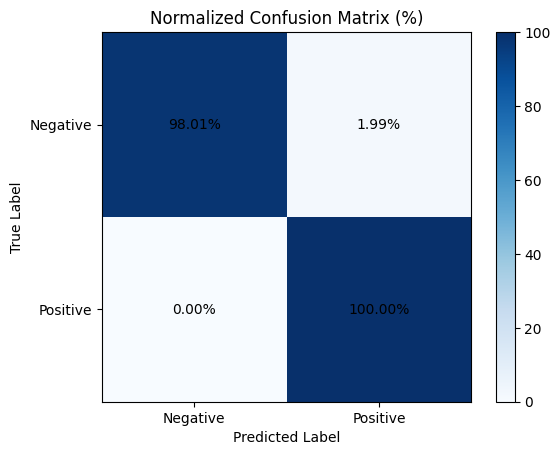

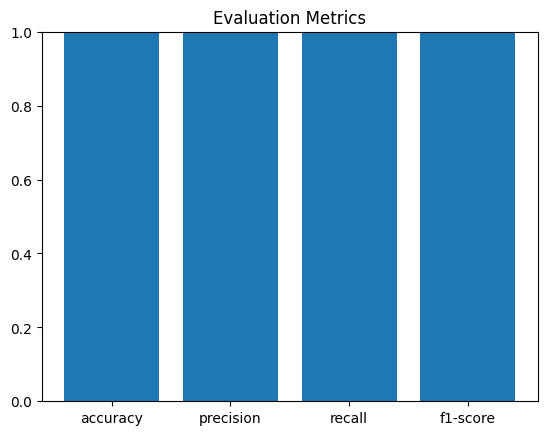

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y.round())
accuracy = accuracy_score(y_test, y.round())
precision = precision_score(y_test, y.round())
recall = recall_score(y_test, y.round())
f1 = f1_score(y_test, y.round())


print('accuracy: %.5f, precision: %.5f, recall = %.5f , f1_score = %.5f' % (accuracy,precision,recall,f1))

# Calculate normalized confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Convert to percentage
cm_norm_percent = cm_norm * 100

# Plot normalized confusion matrix as percentage
plt.imshow(cm_norm_percent, cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix (%)')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
for i in range(cm_norm_percent.shape[0]):
    for j in range(cm_norm_percent.shape[1]):
        plt.text(j, i, format(cm_norm_percent[i, j], '.2f') + '%', ha='center', va='center')
plt.show()

# Plot evaluation metrics
labels = ['accuracy', 'precision', 'recall', 'f1-score']
values = [accuracy, precision, recall, f1]
plt.bar(labels, values)
plt.ylim([0, 1])
plt.title('Evaluation Metrics')
plt.show()

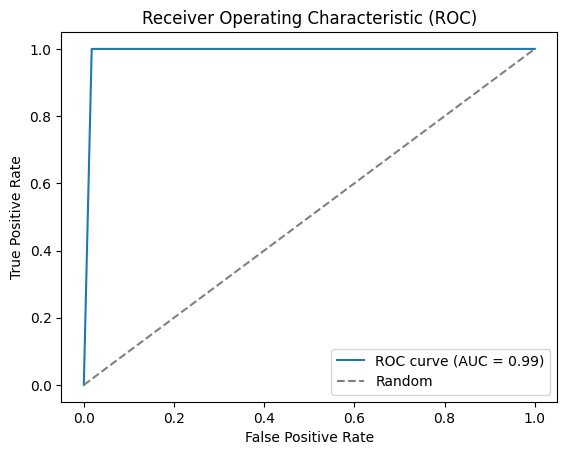

In [ ]:

from sklearn.metrics import roc_curve, auc

# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y.round())

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/capstondesign/test_data/data_scaler_new.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('/content/drive/MyDrive/capstondesign/test_data/timestamp_scaler_new.pkl', 'wb') as f:
    pickle.dump(time_scaler, f)


from keras.models import load_model
model.save('/content/drive/MyDrive/capstondesign/test_data/binary_model_new.h5')